In [18]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [19]:
#Import Data
data = pd.read_csv("VIX_FRED_data.csv")
data["Date"] = pd.to_datetime(data["Date"])
data

,Date,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,GDP,Initial Claims,JPY/USD Spot Rate,Total Nonfarm Employees,Spot Crude Oil Price
0,2014-09-01,5.9,237.477,0.02,0.04,2.53,0.09,3.54,1975.045,12.880,17804.228,1180000,107.43,139564,93.21
1,2014-10-01,5.7,237.430,0.02,0.05,2.30,0.09,3.50,1946.160,16.530,17912.079,1155000,108.03,139804,84.40
2,2014-11-01,5.8,236.983,0.02,0.07,2.33,0.09,3.63,2039.820,13.330,17912.079,1458000,116.30,140088,75.79
3,2014-12-01,5.6,236.252,0.03,0.11,2.21,0.12,3.78,2063.890,15.155,17912.079,1138000,119.32,140366,59.29
4,2015-01-01,5.7,234.747,0.03,0.08,1.88,0.11,3.64,2024.465,19.455,18063.529,1438000,118.25,140562,47.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2024-04-01,3.9,313.207,5.24,5.15,4.54,5.33,5.84,5108.065,15.745,29016.714,841000,153.89,158214,85.35
116,2024-05-01,4.0,313.225,5.25,5.17,4.48,5.33,5.75,5256.815,12.920,29016.714,892000,155.87,158430,80.02
117,2024-06-01,4.1,313.049,5.24,5.15,4.31,5.33,5.63,5433.740,12.645,29016.714,1184000,157.86,158548,79.77
118,2024-07-01,4.3,313.534,5.20,5.01,4.25,5.33,5.53,5550.165,13.190,29016.714,953000,157.52,158637,81.80


In [20]:
summary_stats = data.drop(columns='Date').describe()
summary_stats

,Unemployment Rate,CPI,Three Month T Bill Rate,Six Month T Bill Rate,10-Year Treasury Constant Maturity Rate,Fed Rate,BBB Rate,SP500 Index,VIX,GDP,Initial Claims,JPY/USD Spot Rate,Total Nonfarm Employees,Spot Crude Oil Price
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,1.200000e+02,120.000000,120.000000,120.000000
mean,4.735000,264.336750,1.628083,1.715000,2.421583,1.626833,3.993500,3233.144625,17.724792,22287.942942,1.617425e+06,118.887917,148174.200000,62.335917
std,1.740262,25.288285,1.830762,1.799761,1.004239,1.810618,1.109915,1011.288726,6.762568,3508.616774,2.130207e+06,14.733582,5774.455603,18.517934
min,3.400000,234.747000,0.020000,0.040000,0.620000,0.050000,2.120000,1906.900000,10.005000,17804.228000,7.910000e+05,101.240000,130421.000000,16.550000
25%,3.700000,243.976000,0.107500,0.150000,1.747500,0.120000,3.320000,2351.275000,13.257500,19280.084000,8.987500e+05,108.857500,143808.500000,48.690000
50%,4.200000,255.942000,0.980000,1.110000,2.300000,0.975000,3.770000,2904.670000,15.867500,21397.938000,1.066500e+06,112.770000,148167.000000,59.280000
75%,5.100000,285.289500,2.355000,2.440000,2.902500,2.382500,4.615000,4131.812500,20.567500,25215.491000,1.265500e+06,123.412500,151826.000000,76.162500
max,14.800000,314.121000,5.340000,5.330000,4.800000,5.330000,6.550000,5550.165000,59.415000,29016.714000,1.865300e+07,157.860000,158779.000000,114.840000


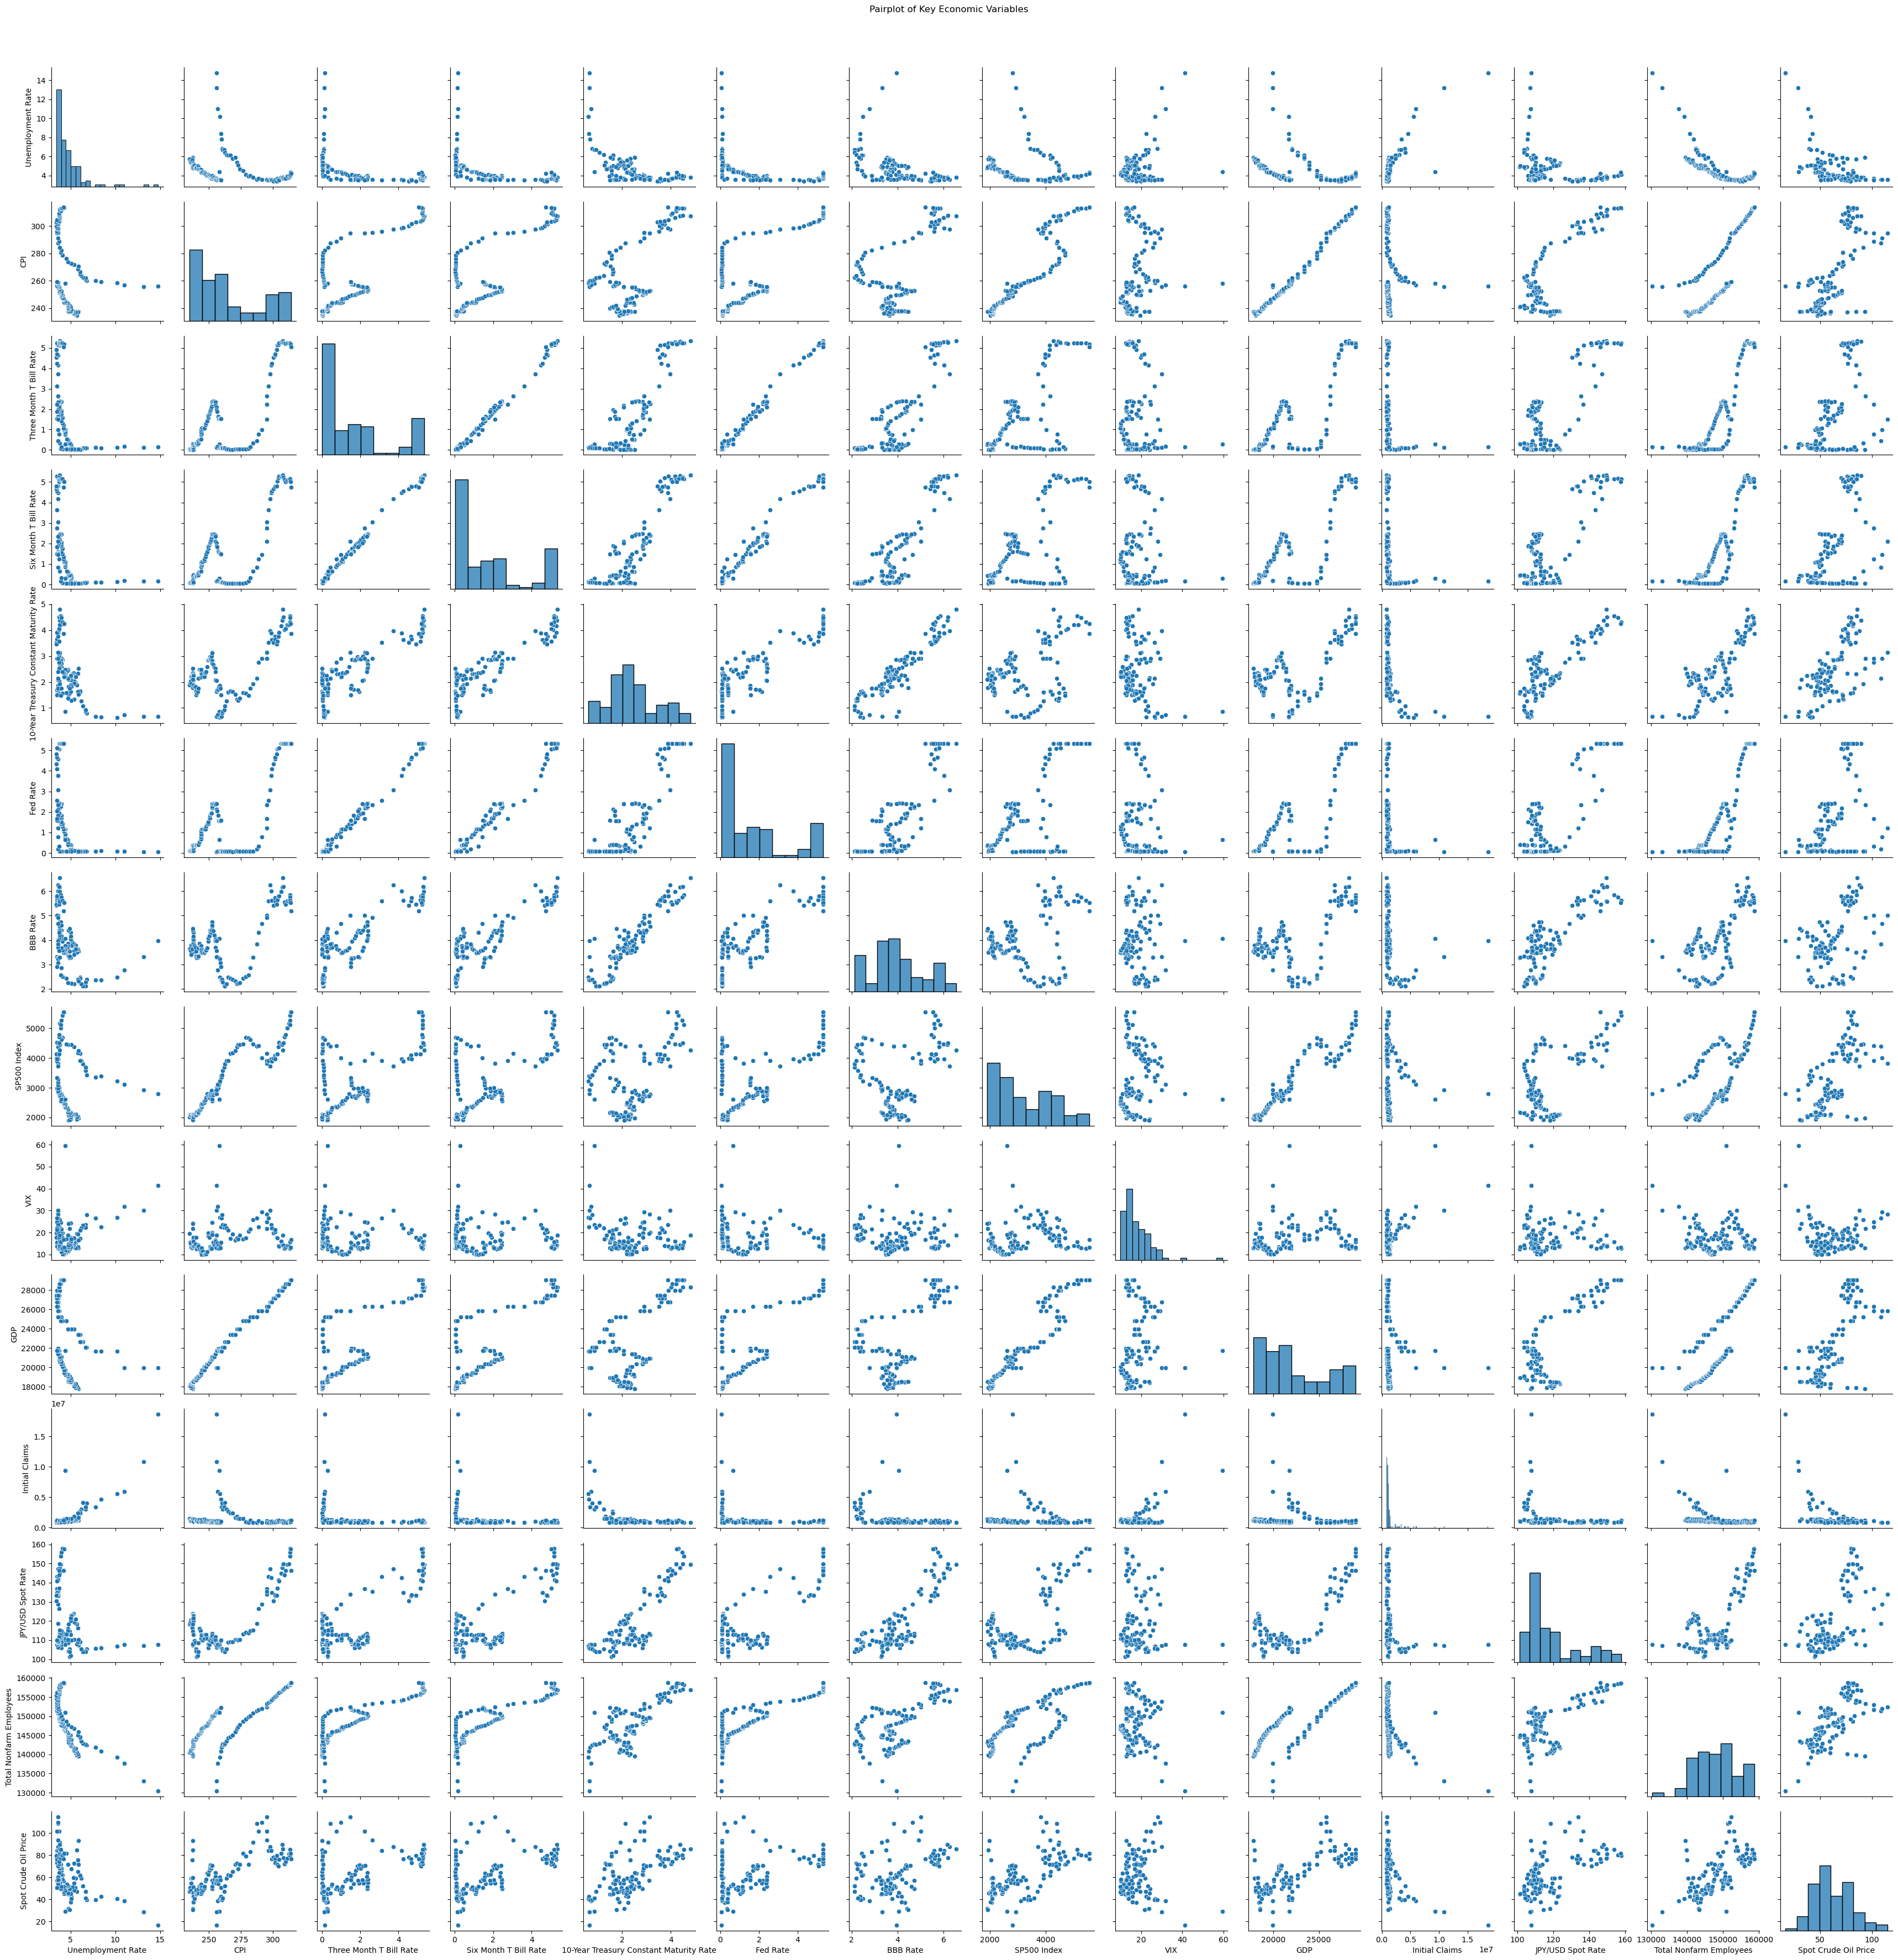

In [21]:
sns.pairplot(data[data.drop(columns='Date').columns.values.tolist()])
plt.suptitle('Pairplot of Key Economic Variables', y=1.02)
plt.show()

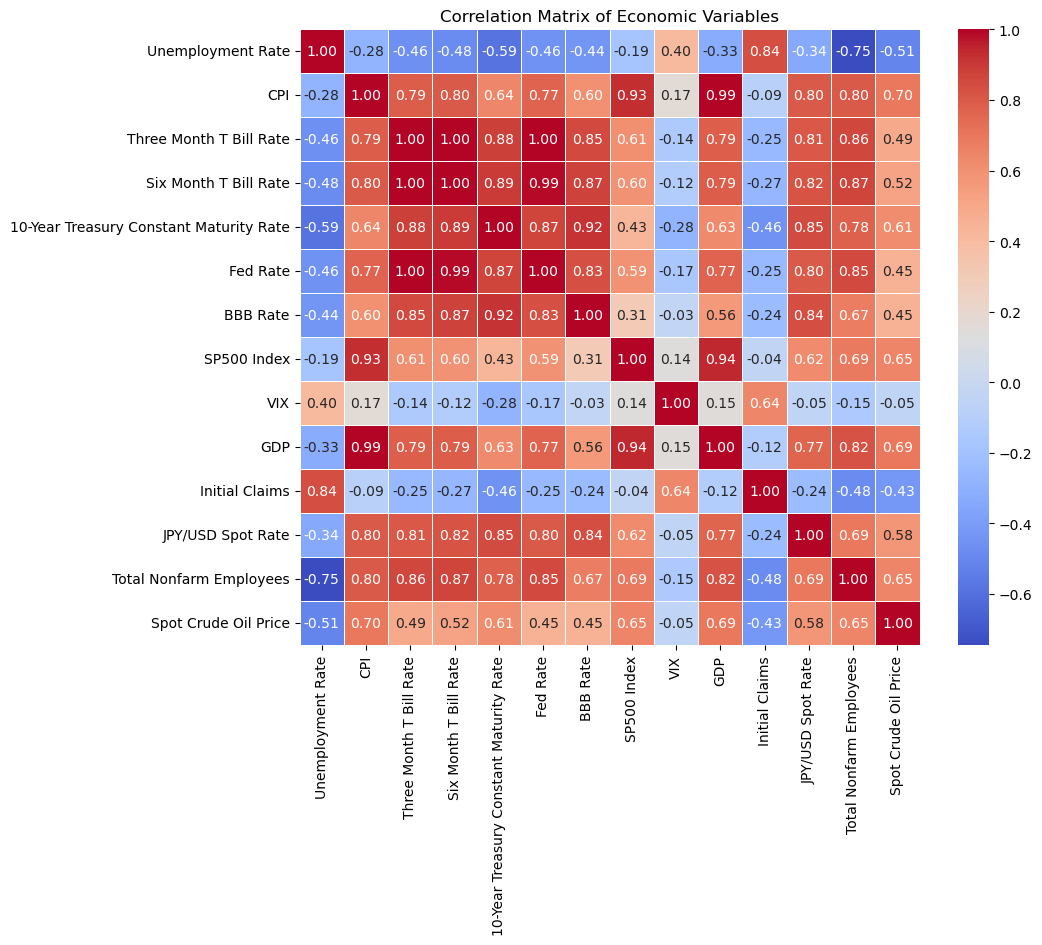

In [22]:
corr_matrix = data.drop(columns=["Date"]).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Economic Variables')
plt.show()

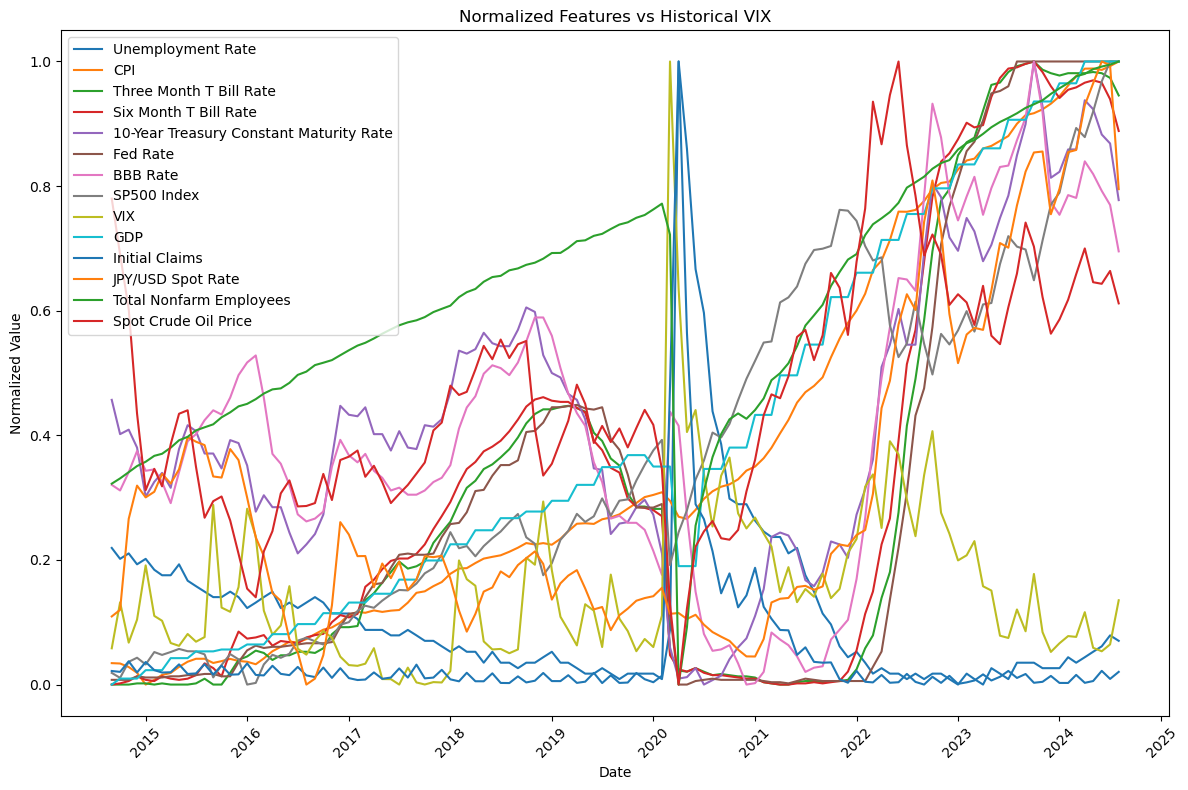

In [23]:
# Normalize the selected features along with VIX for plotting
features_to_normalize = data.drop(columns=["Date"]).columns

# Normalize using Min-Max scaling
normalized_data = data[features_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

# Plot the normalized features together with VIX
plt.figure(figsize=(12, 8))
for column in normalized_data.columns:
    plt.plot(data['Date'], normalized_data[column], label=column)

plt.xticks(rotation=45)
plt.title('Normalized Features vs Historical VIX')
plt.xlabel('Date')
plt.ylabel('Normalized Value')
plt.legend()
plt.tight_layout()
plt.show()

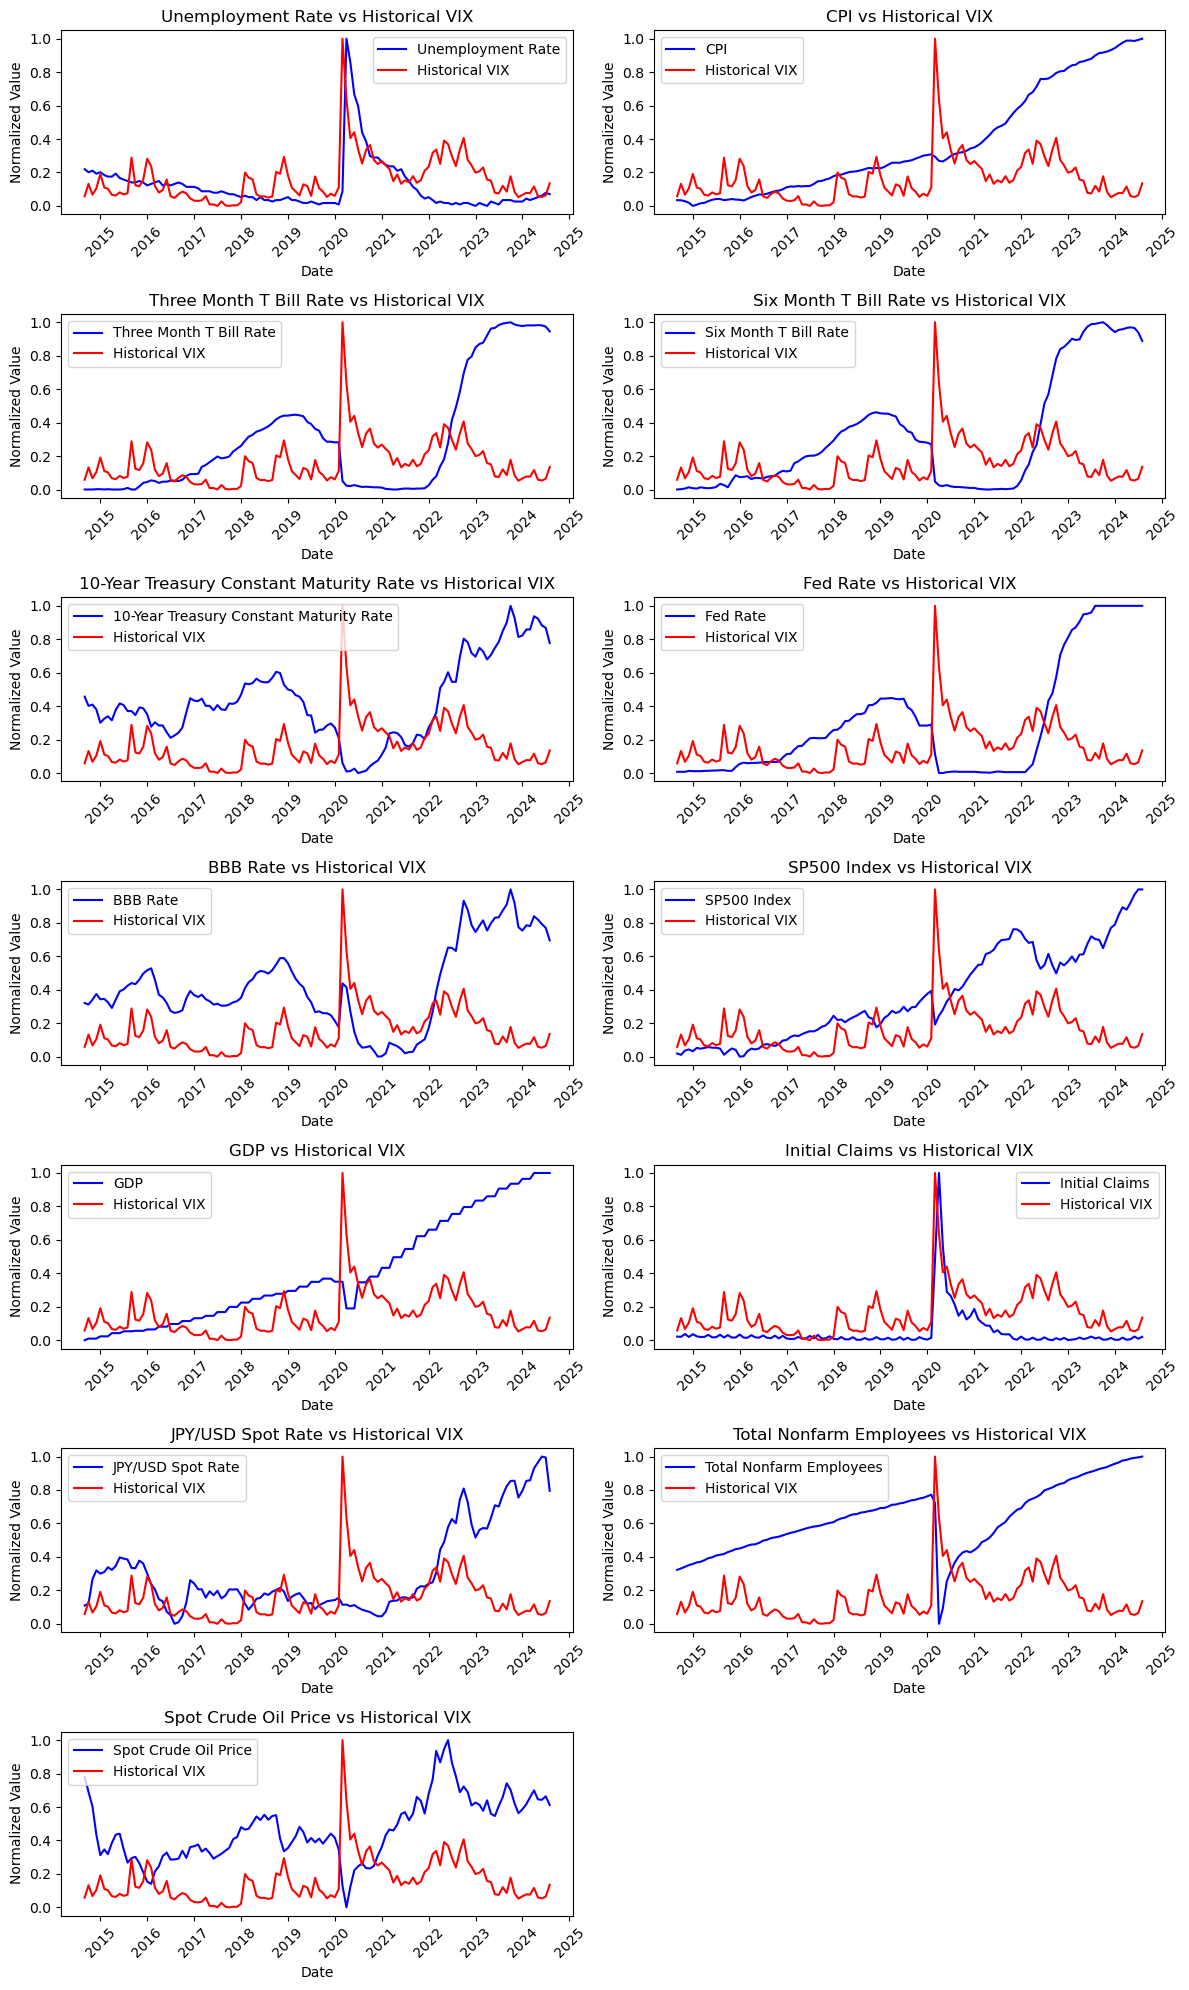

In [24]:
# Create individual plots for each feature along with VIX
features = data.drop(columns=["Date","VIX"]).columns

plt.figure(figsize=(12, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(int(math.ceil(len(features)/2)), 2, i)
    plt.plot(data['Date'], normalized_data[feature], label=feature, color='blue')
    plt.plot(data['Date'], normalized_data['VIX'], label='Historical VIX', color='red')
    plt.xticks(rotation=45)
    plt.title(f'{feature} vs Historical VIX')
    plt.xlabel('Date')
    plt.ylabel('Normalized Value')
    plt.legend()

plt.tight_layout()
plt.show()

In [25]:
#Import Data
yf_data = pd.read_csv("VIX_YF_data.csv")
yf_data["Date"] = pd.to_datetime(yf_data["Date"])
yf_data

,Date,SP500 Volume,NASDAQ Open,NASDAQ High,NASDAQ Low,NASDAQ Close,NASDAQ Adj Close,NASDAQ Volume,DJI Open,DJI High,...,USD INDEX Close,USD INDEX Adj Close,USD INDEX Volume,VXN Open,VXN High,VXN Low,VXN Close,VXN Adj Close,VXN Volume,VIX
0,2014-09-01,66706000000,4592.419922,4610.569824,4464.439941,4493.390137,4493.390137,39631130000,17097.419922,17350.640625,...,85.940002,85.940002,0,12.710000,19.100000,12.710000,18.260000,18.260000,0,12.880
1,2014-10-01,93714040000,4486.649902,4641.509766,4116.600098,4630.740234,4630.740234,50136190000,17040.460938,17395.539062,...,86.879997,86.879997,0,18.260000,31.170000,15.310000,15.810000,15.810000,0,16.530
2,2014-11-01,63600190000,4633.709961,4810.859863,4594.919922,4791.629883,4791.629883,32967990000,17390.900391,17894.830078,...,88.360001,88.360001,0,15.740000,17.180000,13.480000,14.740000,14.740000,0,13.330
3,2014-12-01,80743820000,4777.729980,4814.950195,4547.310059,4736.049805,4736.049805,39587090000,17827.269531,18103.449219,...,90.269997,90.269997,0,14.740000,24.080000,14.300000,19.639999,19.639999,0,15.155
4,2015-01-01,77330040000,4760.240234,4777.009766,4563.109863,4635.240234,4635.240234,38719030000,17823.070312,17951.779297,...,94.800003,94.800003,23290000,19.730000,23.700001,16.389999,21.590000,21.590000,0,19.455
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2024-04-01,81747170000,16397.050781,16490.650391,15222.780273,15657.820312,15657.820312,107535290000,39807.929688,39815.000000,...,106.220001,106.220001,0,17.590000,23.340000,16.340000,18.430000,18.430000,0,15.745
100,2024-05-01,86849720000,15646.089844,17032.660156,15557.639648,16735.019531,16735.019531,140039820000,37845.558594,40077.398438,...,104.669998,104.669998,0,20.150000,20.230000,14.670000,16.700001,16.700001,0,12.920
101,2024-06-01,76025620000,16865.699219,18035.000000,16646.429688,17732.599609,17732.599609,107772060000,38709.988281,39571.230469,...,105.870003,105.870003,0,16.830000,17.980000,6.480000,16.240000,16.240000,0,12.645
102,2024-07-01,80160390000,17773.900391,18671.070312,17015.380859,17599.400391,17599.400391,119005630000,39186.199219,41376.000000,...,104.099998,104.099998,0,16.959999,24.709999,15.880000,22.290001,22.290001,0,13.190


In [26]:
yf_summary_stats = yf_data.drop(columns='Date').describe()
yf_summary_stats

,SP500 Volume,NASDAQ Open,NASDAQ High,NASDAQ Low,NASDAQ Close,NASDAQ Adj Close,NASDAQ Volume,DJI Open,DJI High,DJI Low,...,USD INDEX Close,USD INDEX Adj Close,USD INDEX Volume,VXN Open,VXN High,VXN Low,VXN Close,VXN Adj Close,VXN Volume,VIX
count,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000,1.040000e+02,104.000000,104.000000,104.000000,...,104.000000,104.000000,1.040000e+02,104.000000,104.000000,104.000000,104.000000,104.000000,104.0,104.000000
mean,8.378555e+10,9496.057744,9901.597755,9075.715933,9573.099417,9573.099417,7.143002e+10,26948.772771,27844.927847,26091.704186,...,97.572019,97.572019,2.239423e+05,21.805961,27.737019,17.164904,22.075481,22.075481,0.0,17.471394
std,1.313859e+10,3958.608766,4144.626851,3747.975202,3986.066490,3986.066490,3.281791e+10,7070.434469,7303.064761,6864.914057,...,5.223328,5.223328,2.283772e+06,7.037687,9.175384,5.227278,7.025636,7.025636,0.0,5.705616
min,6.303151e+10,4486.649902,4610.569824,4116.600098,4493.390137,4493.390137,3.296799e+10,16278.620117,16795.980469,15370.330078,...,85.940002,85.940002,0.000000e+00,11.530000,14.080000,6.480000,11.530000,11.530000,0.0,10.005000
25%,7.591144e+10,5906.704834,6037.545044,5796.209961,6013.642456,6013.642456,4.228135e+10,20884.259277,21101.965332,20404.488281,...,94.100002,94.100002,0.000000e+00,16.852500,20.289999,13.547500,16.675000,16.675000,0.0,13.170000
50%,8.132783e+10,8139.390137,8337.599609,7825.510010,8233.890137,8233.890137,5.021426e+10,26312.679688,27011.570312,25273.799805,...,96.934998,96.934998,0.000000e+00,19.764999,24.860000,15.835000,19.705000,19.705000,0.0,15.915000
75%,9.004620e+10,13025.434570,13908.574707,12546.267578,13199.092285,13199.092285,1.000323e+11,33387.706055,34588.952148,32599.027832,...,101.542500,101.542500,0.000000e+00,26.587500,34.475000,19.657499,26.715000,26.715000,0.0,21.057500
max,1.314589e+11,17773.900391,18671.070312,17015.380859,17732.599609,17732.599609,1.429268e+11,40916.960938,41585.210938,39037.941406,...,112.120003,112.120003,2.329000e+07,51.259998,55.689999,32.820000,43.130001,43.130001,0.0,41.380000
